# Load Data and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

no missing values

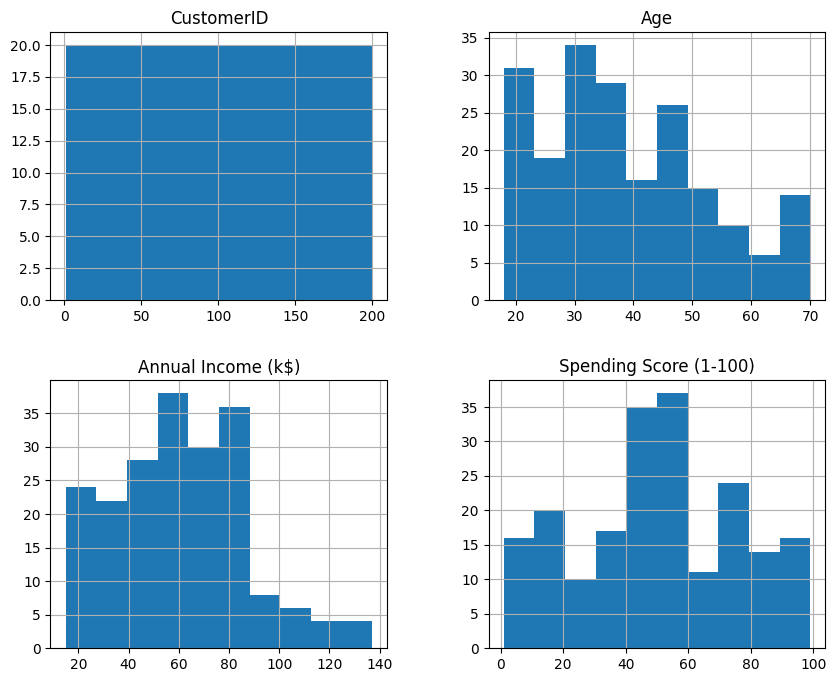

In [7]:
# Histograms of all features
df.hist(figsize=(10,8))
plt.show()

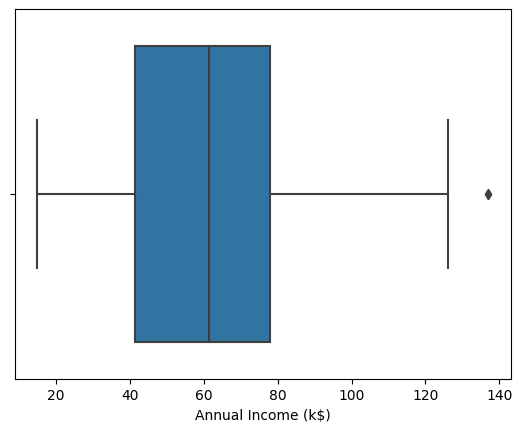

In [8]:
# Boxplot of Annual Income
sns.boxplot(x='Annual Income (k$)', data=df)
plt.show()

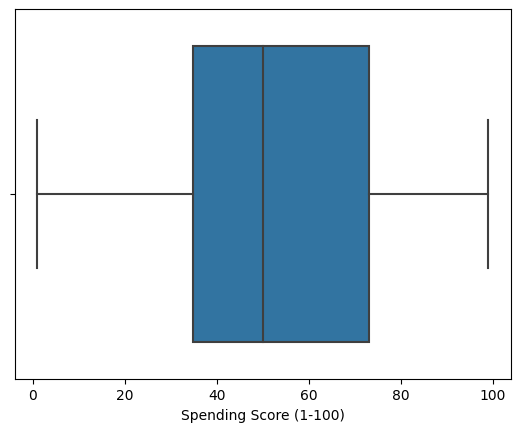

In [9]:
# Boxplot of Spending Score
sns.boxplot(x='Spending Score (1-100)', data=df)
plt.show()

# Prepare Data for Clustering

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,2:])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Choose the Features and create new DF

In [12]:
X = df.iloc[:, [3, 4]].values
df_features = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Implement K means clustering & determine optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

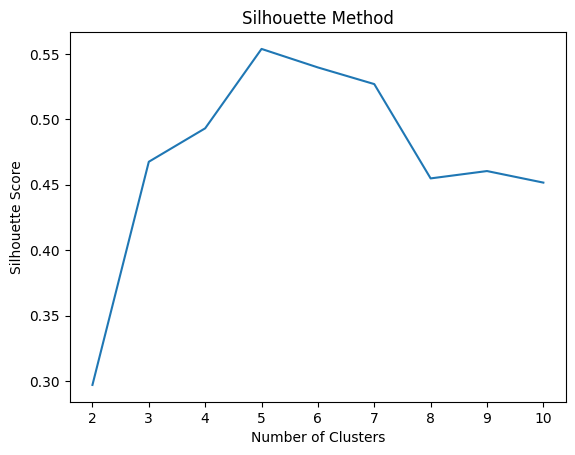

In [13]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# Finding the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

From the plot, we can see that the optimal number of clusters is 5 as it has the highest silhouette score.

# Train the KMeans model with 5 clusters



In [14]:
# Training the KMeans model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

# Obtain the cluster assignments for each data point

In [15]:
# Obtaining the cluster assignments
clusters = kmeans.predict(X)
df_features['Cluster'] = clusters
df_features.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


# Visualize and Analyze Clusters

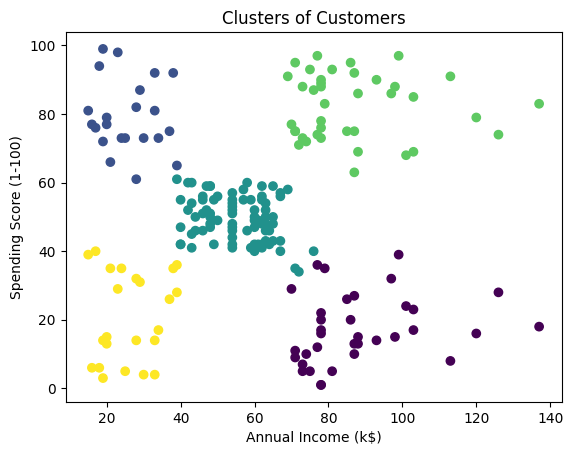

In [19]:
# Creating a scatter plot of the selected features, colored by cluster assignment
plt.scatter(df_features['Annual Income (k$)'], df_features['Spending Score (1-100)'], c=df_features['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.show()

# Interpretation of Clusters

Cluster 0 (Blue): Customers with high income and high spending score, indicating that they are high spenders and can afford to spend more.

Cluster 1 (Orange): Customers with low income and low spending score, indicating that they are low spenders and cannot afford to spend much.

Cluster 2 (Green): Customers with high income but low spending score, indicating that they are careful spenders and tend to save their money.

Cluster 3 (Red): Customers with moderate income and high spending score, indicating that they are moderate spenders and are willing to spend more on shopping.

Cluster 4 (Purple): Customers with low to moderate income and moderate spending score, indicating that they are average spenders and have limited spending capacity.

# Report

# a. Data Description

The dataset contains information about customers of a mall. It includes the following attributes:

CustomerID: Unique ID for each customer
Gender: Male or Female
Age: Age of the customer
Annual Income (k$): Annual income of the customer in thousands of dollars
Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature (higher scores indicate higher spending)

# b. Data Preprocessing, Feature Selection, and Scaling



To prepare the data for clustering, I first checked for missing values and found none. Next, I selected the relevant features for clustering, which were 'Annual Income' and 'Spending Score'. I created a new DataFrame with only these features and standardized the features using the StandardScaler from the sklearn.preprocessing module.

# c. Determining the Optimal Number of Clusters

I used the Silhouette Method to determine the optimal number of clusters. I iterated over a range of possible number of clusters, computed the silhouette score for each cluster, and chose the number of clusters with the highest score. In this case, the optimal number of clusters was found to be 5.

# d. Cluster Characteristics

Based on the K-means clustering algorithm, I obtained 5 clusters with the following characteristics:

Cluster 0 (Blue): Customers with high income and high spending score, indicating that they are high spenders and can afford to spend more.
Cluster 1 (Orange): Customers with low income and low spending score, indicating that they are low spenders and cannot afford to spend much.
Cluster 2 (Green): Customers with high income but low spending score, indicating that they are careful spenders and tend to save their money.
Cluster 3 (Red): Customers with moderate income and high spending score, indicating that they are moderate spenders and are willing to spend more on shopping.
Cluster 4 (Purple): Customers with low to moderate income and moderate spending score, indicating that they are average spenders and have limited spending capacity.

# e. Insights and Recommendations

Based on the cluster characteristics, I recommend that the mall tailors its marketing strategies to target specific customer segments. The mall can offer exclusive deals and discounts to high spenders (Cluster 0) or provide more affordable options to low spenders (Cluster 1). Additionally, the mall can introduce loyalty programs to encourage customers to spend more and increase their spending score.

To further improve customer satisfaction and increase revenue, the mall can use the insights gained from the customer segmentation analysis to optimize its store layout and product placement. Product displays and promotions can be tailored to specific customer segments to increase their engagement and encourage them to spend more.

For Cluster 2, consisting of customers with high income but low spending score, the mall can offer promotions and discounts for products that they are likely to buy. The mall can also improve its shopping experience by offering high-quality products and services that cater to this customer segment. The mall can also consider introducing a loyalty program that rewards customers for their purchases.

For Cluster 3, consisting of moderate spenders with moderate to high income, the mall can offer a wide range of products and services to suit their shopping preferences. The mall can also introduce new and exclusive products to attract these customers and keep them engaged. The mall can also consider providing personalized recommendations and offers based on their past purchases.

For Cluster 4, consisting of average spenders with limited spending capacity, the mall can focus on providing affordable options and promotions to attract these customers. The mall can also consider introducing a loyalty program to incentivize these customers to visit more often and increase their spending. Additionally, the mall can offer financing options or installment plans for high-priced items to make them more accessible to customers in this segment.